In [1]:
from sympy import *
from sympy.plotting import plot, plot3d
import matplotlib.pyplot as plt
import numpy as np

## № 1

а) $f(x,y)=x(y-5)^2$.

In [2]:
x, y = symbols ('x, y')

In [3]:
f1 = x * (y - 5) **2
f1

x*(y - 5)**2

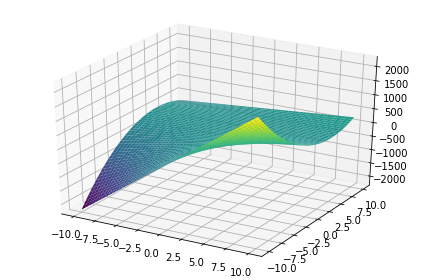

In [4]:
plot3d(f1)

In [5]:
df1_dx = diff(f1, x)
df1_dx

(y - 5)**2

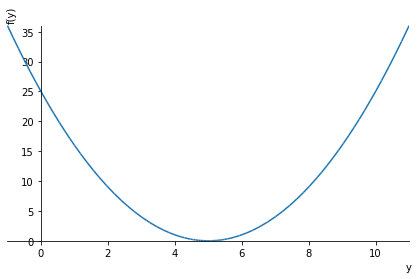

In [6]:
plot(df1_dx, (y,-1,11))

In [7]:
solve(df1_dx)

[5]

In [8]:
df1_dy = diff(f1, y)
df1_dy

x*(2*y - 10)

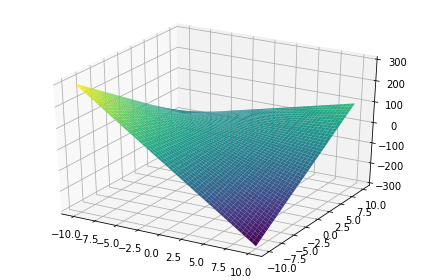

In [9]:
plot3d(df1_dy)

In [10]:
solve(df1_dy)

[{x: 0}, {y: 5}]

б) $f(x,y)=(y-e / 20)^2sin(\pi x)$.

In [11]:
f2 = (y - exp(1) / 20) **2 * sin (pi * x)
f2

(y - E/20)**2*sin(pi*x)

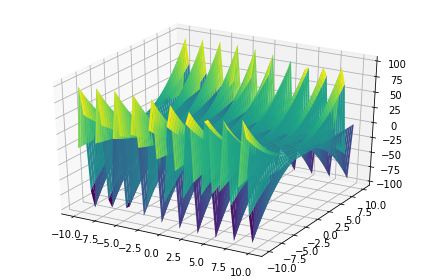

In [12]:
plot3d(f2)

In [13]:
df2_dx = diff(f2, x)
df2_dx

pi*(y - E/20)**2*cos(pi*x)

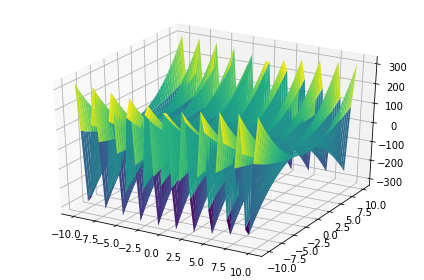

In [14]:
plot3d(df2_dx)

In [15]:
solve(df2_dx)
# еще для х : 1/2 + k, k - целое число

[{x: 1/2}, {x: 3/2}, {y: E/20}]

In [16]:
df2_dy = diff(f2, y)
df2_dy

(2*y - E/10)*sin(pi*x)

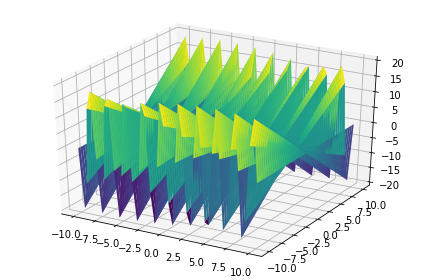

In [17]:
plot3d(df2_dy)

In [18]:
solve(df2_dy)
# еще для х : k, k - целое число

[{x: 0}, {x: 1}, {y: E/20}]

в) $f(x,y)=x sin(x) sin (y - 2)$.

In [19]:
f3 = x * sin (x) * sin (y - 2)
f3

x*sin(x)*sin(y - 2)

In [20]:
df3_dx = diff(f3, x)
df3_dx

x*sin(y - 2)*cos(x) + sin(x)*sin(y - 2)

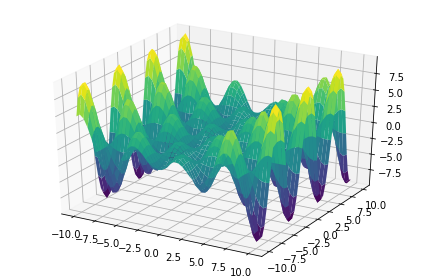

In [21]:
plot3d(df3_dx)

In [22]:
solve(df3_dx)
# # еще для y : 2 + pi * k, k - целое число

[{y: 2}, {y: 2 + pi}]

In [23]:
df3_dy = diff(f3, y)
df3_dy

x*sin(x)*cos(y - 2)

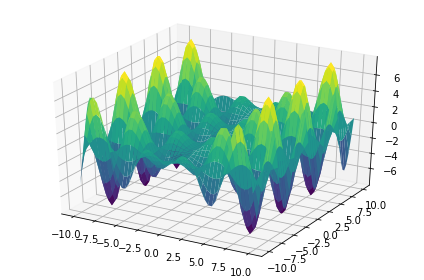

In [24]:
plot3d(df3_dy)

In [25]:
solve(df3_dy)
# еще для х : pi * k, k - целое число
# еще для y : 2 + pi / 2 + pi * k, k - целое число

[{x: 0}, {x: pi}, {y: 2 + 3*pi/2}, {y: pi/2 + 2}]

## № 2

t = f (m, N) <br>
m = x1 - масса, кг <br>
N = x2 - мощность, лс  <br>
t = y - время разгона, с <br>

In [26]:
x1, x2, a1, a2, a0, y = symbols ('x1, x2, a1, a2, a0, y')

In [27]:
# вид функции
f = a2 * x2 + a1 * x1 + a0 

In [28]:
# исходные данные
m = [1945, 1495, 1570, 1520]
N = [560, 340, 343, 431]
t = [4.3, 4.9, 5.2]

In [29]:
n = len(t)

In [30]:
# суммарная квадратичная ошибка
mse = (f - y) **2
mse

(a0 + a1*x1 + a2*x2 - y)**2

In [31]:
# суммарная квадратичная ошибка
MSE = 0
for i in range (n):
    MSE = MSE +  mse.subs({x2:N[i], x1:m[i], y:t[i]})
MSE

3783025*(a0/1945 + a1 + 112*a2/389 - 0.00221079691516709)**2 + 2464900*(a0/1570 + a1 + 343*a2/1570 - 0.00331210191082803)**2 + 2235025*(a0/1495 + a1 + 68*a2/299 - 0.00327759197324415)**2

In [32]:
# средняя квадратичная ошибка
MSE = MSE / n
MSE

3783025*(a0/1945 + a1 + 112*a2/389 - 0.00221079691516709)**2/3 + 2464900*(a0/1570 + a1 + 343*a2/1570 - 0.00331210191082803)**2/3 + 2235025*(a0/1495 + a1 + 68*a2/299 - 0.00327759197324415)**2/3

In [33]:
# производная по а2
dMSE_da2 = diff (MSE, a2)
dMSE_da2

2486*a0/3 + 4272020*a1/3 + 364566*a2 - 3905.06666666667

In [34]:
# производная по а1
dMSE_da1 = diff (MSE, a1)
dMSE_da1

3340*a0 + 5655300*a1 + 4272020*a2/3 - 15902.0

In [35]:
# производная по а0
dMSE_da0 = diff (MSE, a0)
dMSE_da0

2*a0 + 3340*a1 + 2486*a2/3 - 9.6

In [36]:
# приравнивание частных производных к 0
nonlinsolve([dMSE_da2, dMSE_da1, dMSE_da0], [a2, a1, a0])

FiniteSet((-0.0118811881188111, 0.0044752475247521, 2.24910891089141))

In [37]:
# значение СКО
MSE.subs({a2: -0.0118811881188111, a1: 0.0044752475247521, a0: 2.24910891089141})

4.79074721582257e-28

In [38]:
# полученная функция
f_new = f.subs({a2: -0.0118811881188111, a1: 0.0044752475247521, a0: 2.24910891089141})
f_new

0.0044752475247521*x1 - 0.0118811881188111*x2 + 2.24910891089141

In [39]:
# проверка известных значений
for i in range (n):
    print (f_new.subs({x2:N[i], x1:m[i]}))


4.30000000000003
4.90000000000003
5.20000000000000


In [40]:
# время разгона
f_new.subs({x2:N[3], x1:m[3]})

3.93069306930702